# Notebook #4: Geochem Specific Libraries

## Table of Contents:
###  1) GeoPandas
###  2) EarthChem Client
###  3) Pyrolite


### 1) GeoPandas

#### GeoPandas is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types.

In [1]:
## First, lets install the geopandas library
!pip install geopandas

In [2]:
## Now, lets double check that the download has worked by importing and checking the version
import geopandas

geopandas.__version__

'0.10.2'

In [3]:
## Since we know it works, we can now move onto the main concepts of geopandas.
## First is the GeoDataFrame data structure. This is essentially a pandas datadrame, that can store geometry columns 
## and perform spatial operations.

import geopandas

path_to_data = geopandas.datasets.get_path("nybb") # Here we are calling upon an inbuilt(to the geopandas install) dataset 
gdf = geopandas.read_file(path_to_data) # Using the read_file method creates a geodataframe

gdf

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [4]:
## We can also write to files by using geopandas.

gdf.to_file("my_write_test.geojson", driver="GeoJSON")

In [5]:
## Since we now have geometric data, we can now get certain attributes from this data, like area.

gdf = gdf.set_index("BoroName")
gdf["area"] = gdf.area
gdf["area"]

BoroName
Staten Island    1.623822e+09
Queens           3.045214e+09
Brooklyn         1.937478e+09
Manhattan        6.364712e+08
Bronx            1.186926e+09
Name: area, dtype: float64

In [6]:
## We can also get boundaries.
gdf['boundary'] = gdf.boundary
gdf['boundary']

BoroName
Staten Island    MULTILINESTRING ((970217.022 145643.332, 97022...
Queens           MULTILINESTRING ((1029606.077 156073.814, 1029...
Brooklyn         MULTILINESTRING ((1021176.479 151374.797, 1021...
Manhattan        MULTILINESTRING ((981219.056 188655.316, 98094...
Bronx            MULTILINESTRING ((1012821.806 229228.265, 1012...
Name: boundary, dtype: geometry

In [7]:
## Also, centroids.
gdf['centroid'] = gdf.centroid
gdf['centroid']

BoroName
Staten Island     POINT (941639.450 150931.991)
Queens           POINT (1034578.078 197116.604)
Brooklyn          POINT (998769.115 174169.761)
Manhattan         POINT (993336.965 222451.437)
Bronx            POINT (1021174.790 249937.980)
Name: centroid, dtype: geometry

In [10]:
## And, distances.
first_point = gdf['centroid'].iloc[0]
gdf['distance'] = gdf['centroid'].distance(first_point)
gdf['distance']

BoroName
Staten Island         0.000000
Queens           103781.535276
Brooklyn          61674.893421
Manhattan         88247.742789
Bronx            126996.283623
Name: distance, dtype: float64

In [11]:
## One important thing to remember is that since geopandas is just a jacket over pandas, you still have all the functionalty
## of pandas at your fingertips
gdf['distance'].mean()

76140.09102166798

<AxesSubplot:>

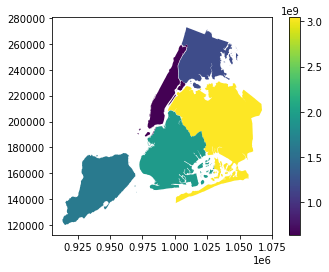

In [12]:
## Geopandas can also give us some visualizations with the geometric data, like maps.
gdf.plot("area", legend=True)

In [ ]:
## If you want an interactive map, you can use the following
gdf.explore("area", legend=False)

### 2) EarthChem Client

#### To quote the creator's github repository, "This project wraps the Earthchem web services to provide easy access to geochemical data from IEDA in ready-to-use format in your favourite PyData environment." Essentially, we can use this repository and the client to pull any data we want from EarthChem and also do some light manipulations on it.

In [1]:
## First, lets install the earthchem library
!pip install earthchem

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 KB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 752.5/752.5 KB 8.4 MB/s eta 0:00:0000:0100:01


In [3]:
## Now lets do a quick check that the download worked.
import earthchem

earthchem.__version__

ConnectionError: HTTPConnectionPool(host='ecp.iedadata.org', port=80): Max retries exceeded with url: /rest_search_documentation/ (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f9c1b73b6a0>: Failed to establish a new connection: [Errno -2] Name or service not known'))

### 3) Pyrolite